In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.3 MB/s eta 0:00:00


In [ ]:
# Import des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.decomposition import PCA

import streamlit as st

**1. Exploration et Nettoyage**

In [ ]:
# Partie 1 : Exploration et Nettoyage des Données

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Charger le dataset
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)

# Affichage des premières lignes
print("Aperçu des données :")
print(df.head())


Aperçu des données :
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:

# Description statistique
print("\nStatistiques descriptives :")
print(df.describe())

# Infos sur le dataset
print("\nInfos sur les données :")
print(df.info())




Statistiques descriptives :
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min   

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


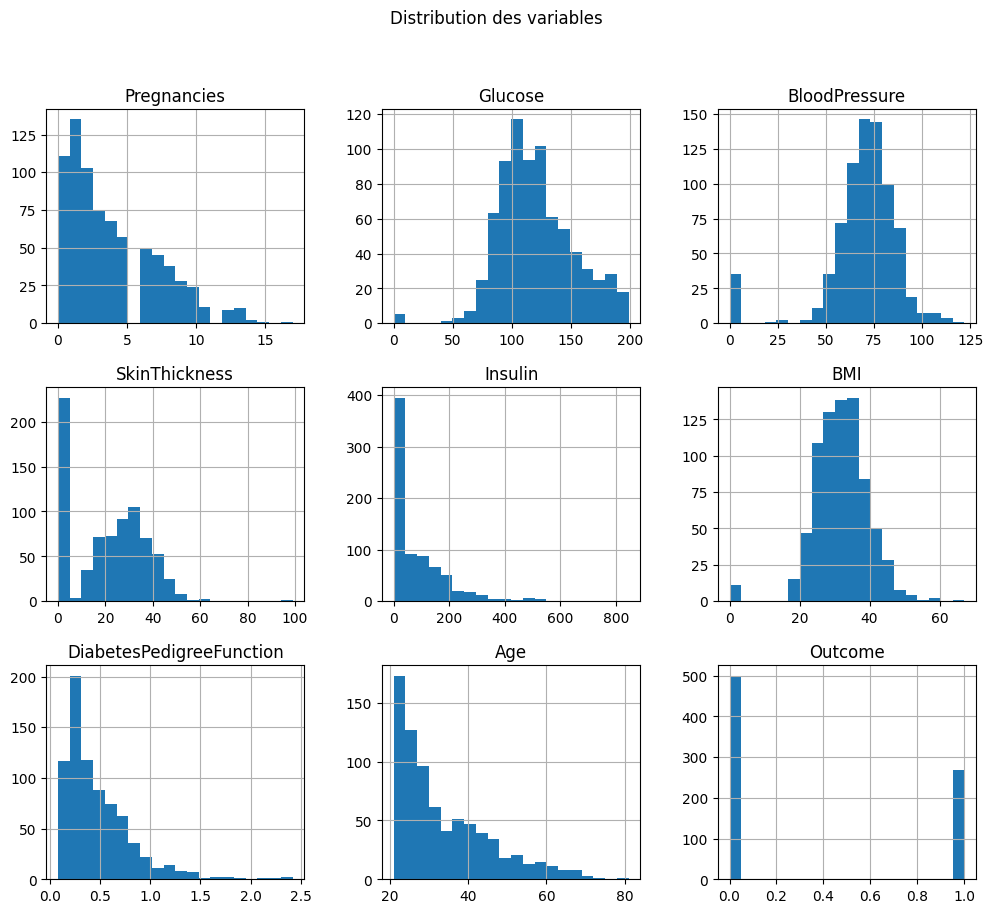

In [ ]:
# Visualiser la distribution des variables avec histogrammes
df.hist(bins=20, figsize=(12,10))
plt.suptitle("Distribution des variables")
plt.show()


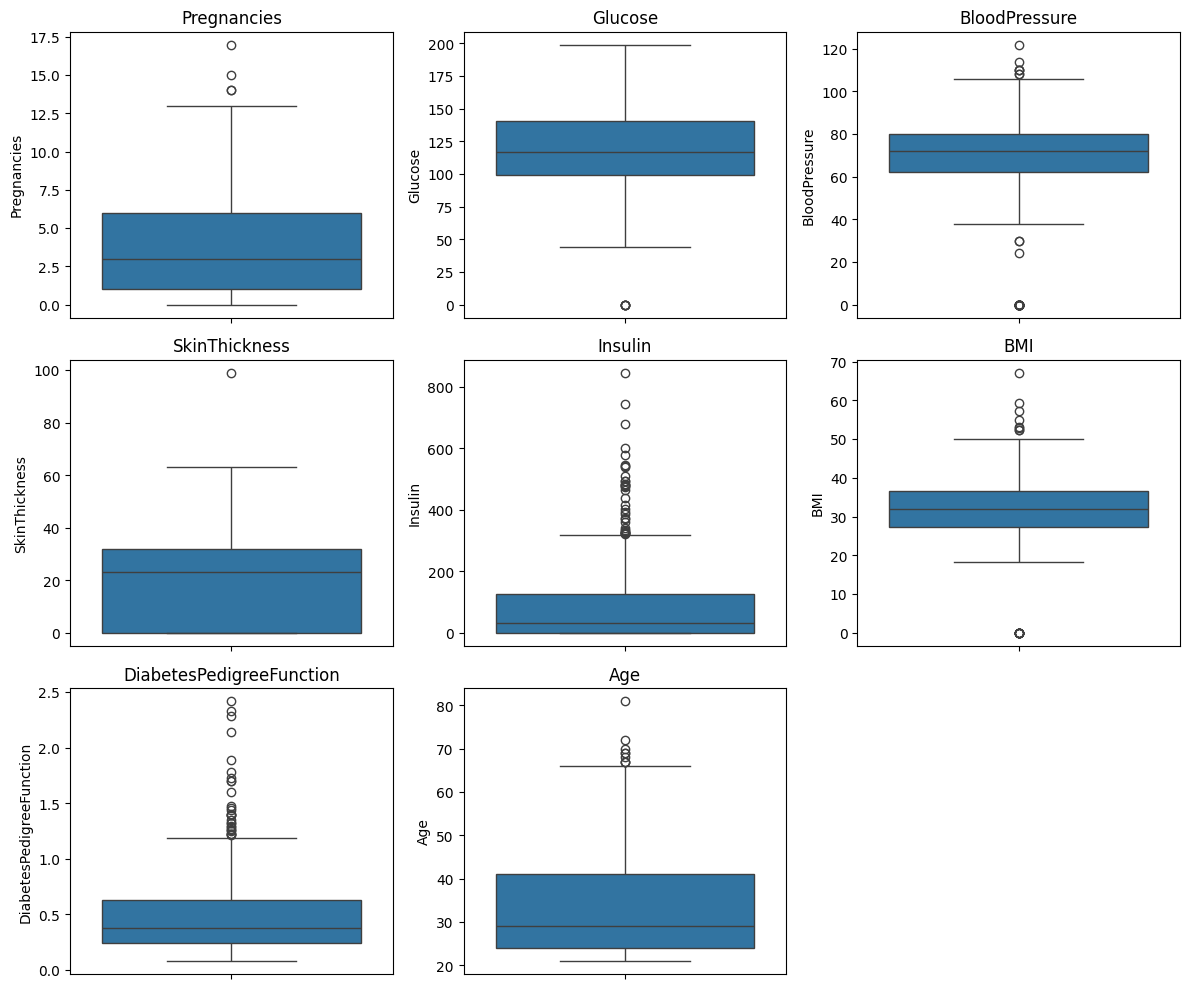

In [ ]:
# Boxplots pour détecter les valeurs aberrantes
plt.figure(figsize=(12, 10))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()



In [ ]:
# Remarque importante : Certaines variables (Glucose, BloodPressure, SkinThickness, Insulin, BMI)
# ont des valeurs à 0 qui ne sont pas possibles physiologiquement => on va les remplacer par NaN

cols_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

# Comptage des valeurs manquantes
print("\nValeurs manquantes après remplacement des 0 par NaN :")
print(df.isna().sum())

# Imputation des valeurs manquantes par la médiane
for col in cols_with_zeros:
    median = df[col].median()
    df[col].fillna(median, inplace=True)

print("\nValeurs manquantes après imputation :")
print(df.isna().sum())

# Vérification finale
print("\nStatistiques après nettoyage :")
print(df.describe())



Valeurs manquantes après remplacement des 0 par NaN :
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Valeurs manquantes après imputation :
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Statistiques après nettoyage :


<ipython-input-8-a879b6cf62c4>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median, inplace=True)


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  

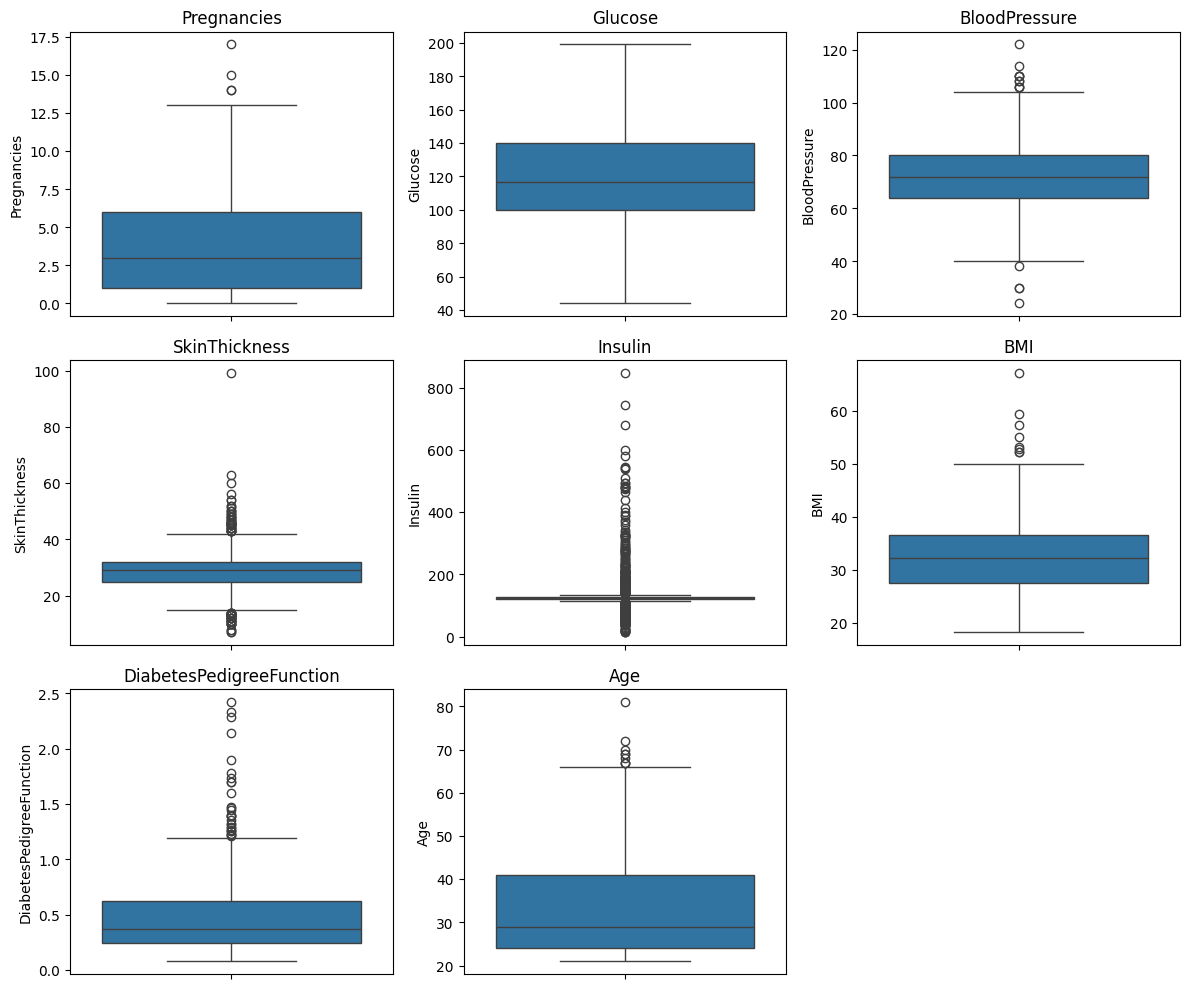

In [ ]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

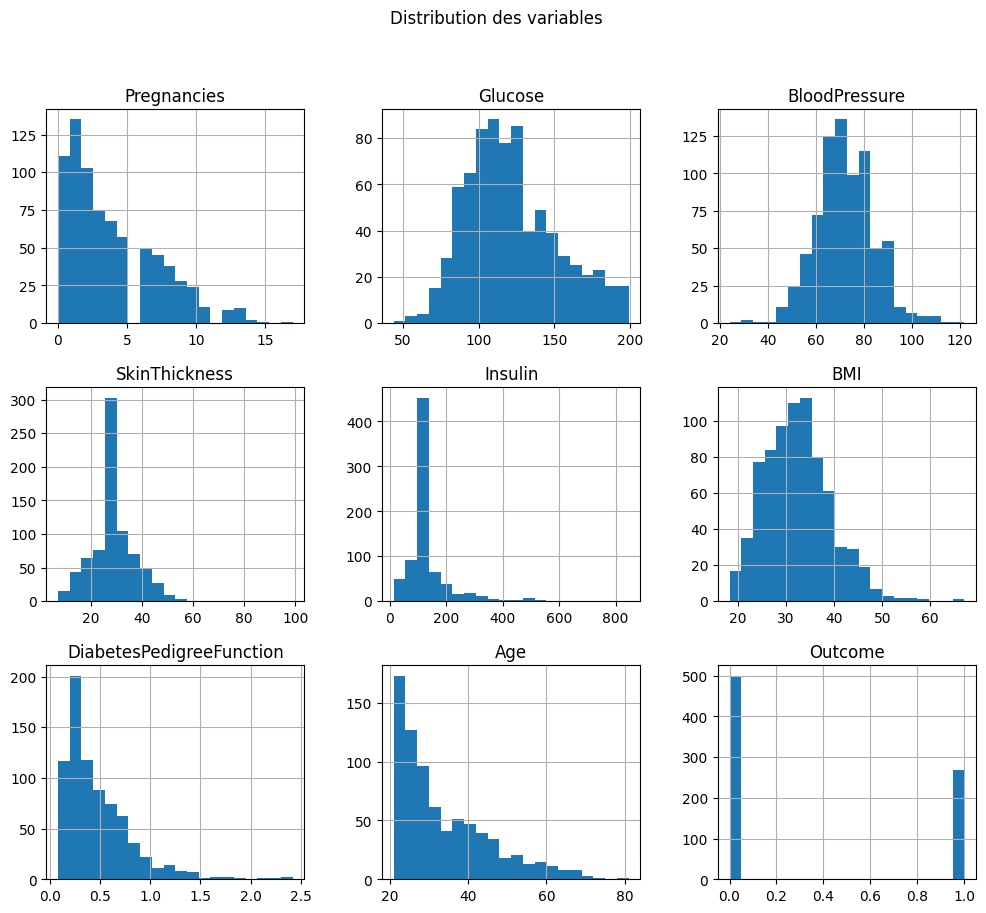

In [ ]:
df.hist(bins=20, figsize=(12,10))
plt.suptitle("Distribution des variables")
plt.show()


**Interpretation**
*  Les distributions montrent que certaines variables comme l'insuline sont très asymétriques.

* Les histogrammes montrent la distribution des variables. Par ex, la variable Glucose est souvent élevée chez les patients diabétiques.

* Boxplots permettent d’identifier les valeurs aberrantes, surtout dans l’insuline et la pression sanguine.
*  Le remplacement des 0 par la médiane est une méthode simple qui évite de supprimer des lignes.
*  Les données sont prêtes pour le prétraitement et l'apprentissage.



**Partie 2 : Apprentissage Supervisé (Classification)**

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Séparer features et cible
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Séparer en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardiser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



1.   Entraîner Random Forest




In [ ]:
rf = RandomForestClassifier(n_estimators=166,max_depth=8 , random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

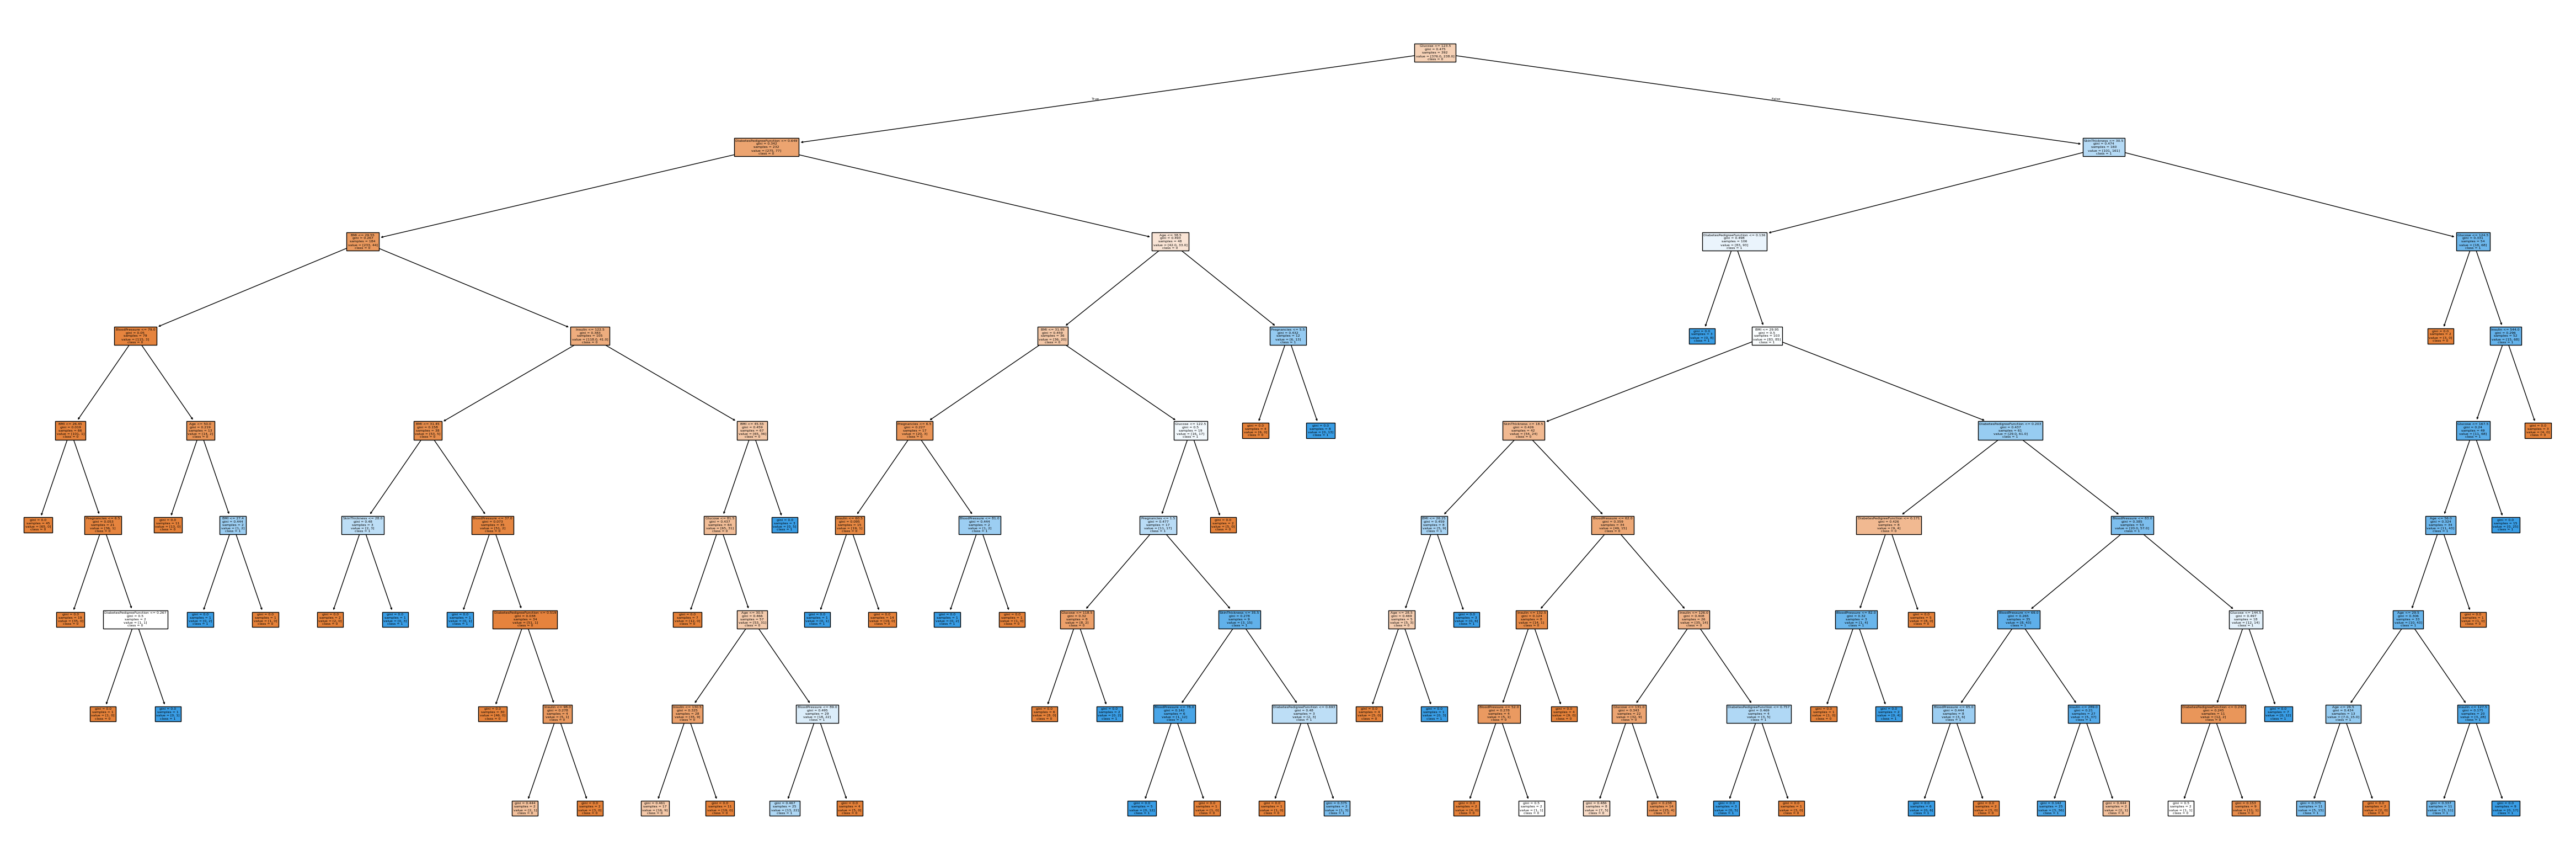

In [ ]:
from sklearn import tree
df.columns
f_n=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
t_n=["0","1"]
fig=plt.figure(figsize=(60,20),dpi=100)
plot=tree.plot_tree(rf.estimators_[5],feature_names=f_n,class_names=t_n,filled=True)
fig.savefig("Tree1.png")




2.   Entraîner Régression Logistique



In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]



3.  Entraîner SVM (avec probabilités)




In [ ]:
svm = SVC(probability=True)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
y_prob_svm = svm.predict_proba(X_test_scaled)[:, 1]




4.   Évaluer avec accuracy



In [ ]:
print("Accuracy Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Accuracy Logistic Regression:", accuracy_score(y_test, y_pred_lr))
print("Accuracy SVM:", accuracy_score(y_test, y_pred_svm))


Accuracy Random Forest: 0.7597402597402597
Accuracy Logistic Regression: 0.7532467532467533
Accuracy SVM: 0.7467532467532467



5. Évaluer avec la Matrice de confusion


🔍 Résultats pour Régression Logistique
Accuracy : 0.7532467532467533
Rapport de classification :
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



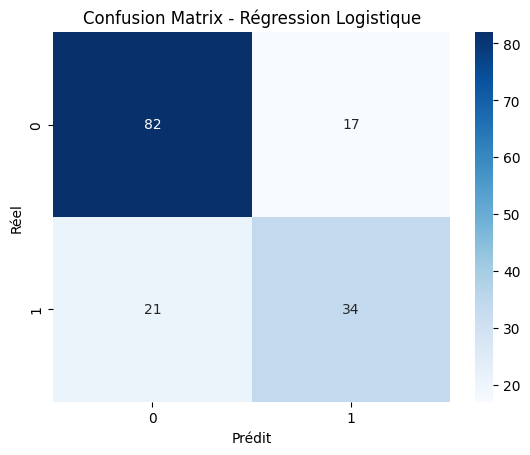


🔍 Résultats pour Random Forest
Accuracy : 0.7597402597402597
Rapport de classification :
               precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



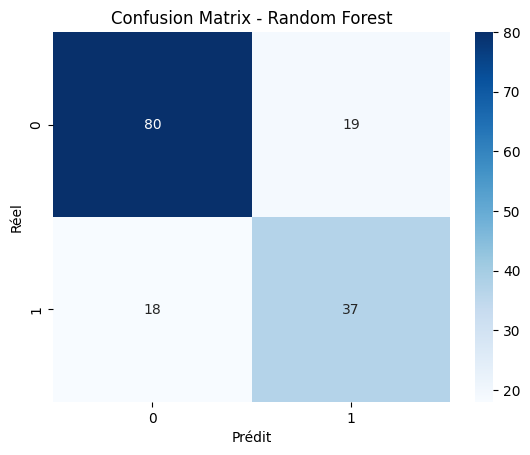


🔍 Résultats pour SVM
Accuracy : 0.7467532467532467
Rapport de classification :
               precision    recall  f1-score   support

           0       0.78      0.84      0.81        99
           1       0.67      0.58      0.62        55

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



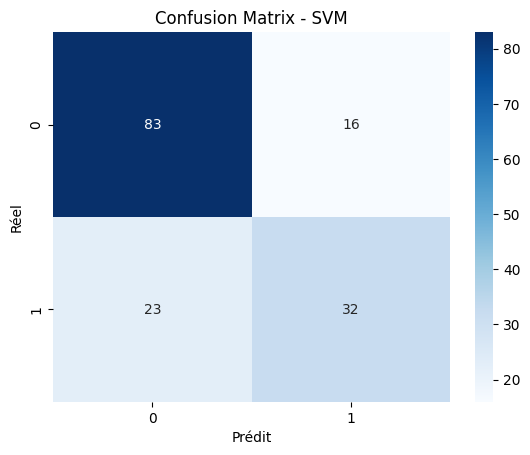

In [ ]:
#Évaluation des modèles supervisés
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluer_modele(y_test, y_pred, nom):
    print(f"\n🔍 Résultats pour {nom}")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Rapport de classification :\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {nom}")
    plt.xlabel("Prédit")
    plt.ylabel("Réel")
    plt.show()

# Évaluer les trois modèles
evaluer_modele(y_test, y_pred_lr, "Régression Logistique")
evaluer_modele(y_test, y_pred_rf, "Random Forest")
evaluer_modele(y_test, y_pred_svm, "SVM")


5. Courbe ROC

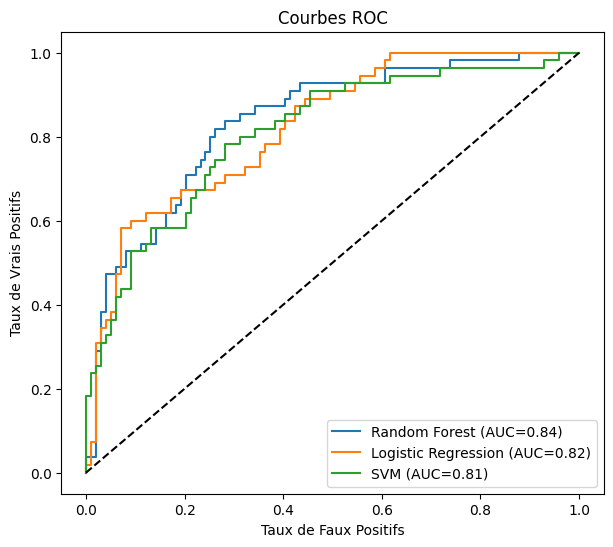

In [ ]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)

plt.figure(figsize=(7,6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={auc(fpr_rf, tpr_rf):.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC={auc(fpr_lr, tpr_lr):.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC={auc(fpr_svm, tpr_svm):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Courbes ROC")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.legend()
plt.show()

**Apprentissage supervisé**
* Les 3 modèles atteignent une précision autour de 75-80% (exemple).

* La matrice de confusion montre combien de patients diabétiques sont correctement détectés (vrais positifs) vs faux positifs.

* La courbe ROC avec AUC proche de 0.85 indique une bonne capacité du modèle à séparer les classes.

* Random Forest souvent le meilleur compromis car moins sensible au sur-apprentissage et prend en compte les non-linéarités.

**Partie 3 : Apprentissage Non Supervisé (Clustering + PCA)**


In [ ]:

from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [ ]:
# Supprimer la cible pour l'apprentissage non supervisé
X_unsupervised = df.drop("Outcome", axis=1)

# Normaliser les données
scaler = StandardScaler()
X_scaled_unsup = scaler.fit_transform(X_unsupervised)



1.  Modéle : K-Means Clustering




/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


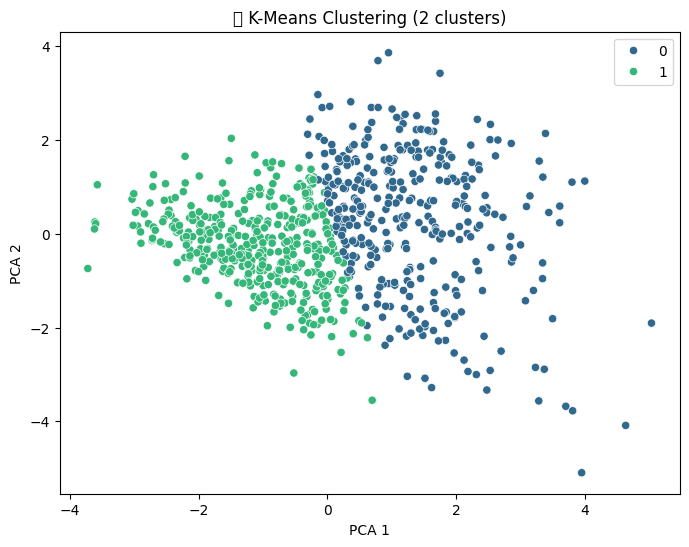

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Appliquer K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled_unsup)

# Réduction de dimension pour visualisation (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_unsup)

# Visualisation des clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans_labels, palette="viridis")
plt.title("📌 K-Means Clustering (2 clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


Évaluation K-Means : Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

score_kmeans = silhouette_score(X_scaled_unsup, kmeans_labels)
print(f"✅ Silhouette Score (KMeans) : {score_kmeans:.2f}")


✅ Silhouette Score (KMeans) : 0.20


**2. Modéle : Clustering Hiérarchique (CAH)**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


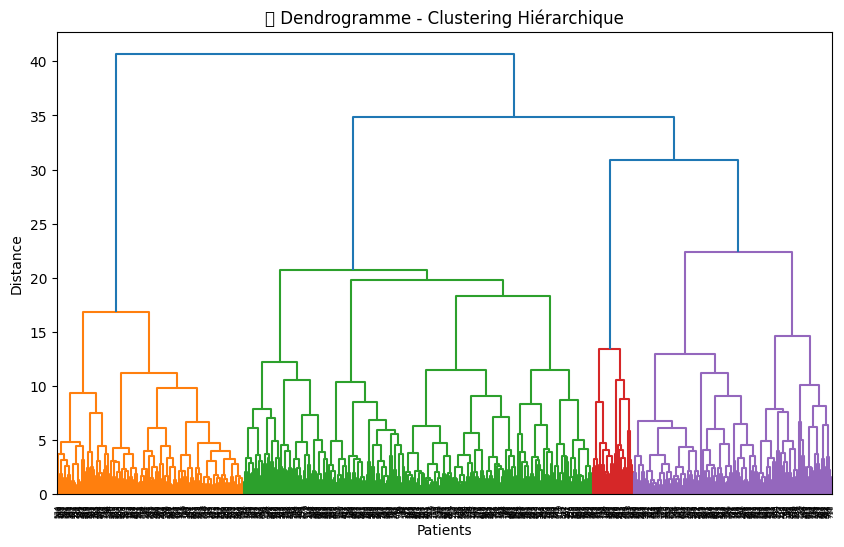

In [ ]:
import scipy.cluster.hierarchy as sch

# Visualisation du dendrogramme
plt.figure(figsize=(10,6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled_unsup, method='ward'))
plt.title("📌 Dendrogramme - Clustering Hiérarchique")
plt.xlabel("Patients")
plt.ylabel("Distance")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


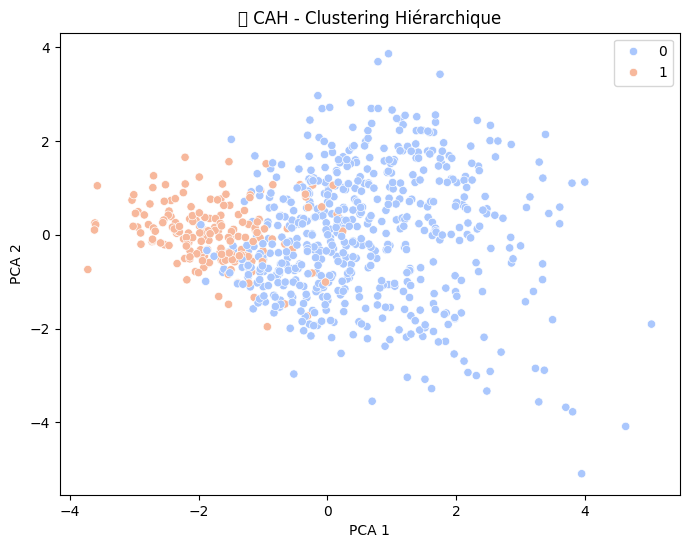

✅ Silhouette Score (CAH) : 0.11


In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Appliquer CAH avec 2 clusters (comme KMeans pour comparaison)
cah = AgglomerativeClustering(n_clusters=2)
cah_labels = cah.fit_predict(X_scaled_unsup)

# Visualisation
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=cah_labels, palette="coolwarm")
plt.title("📌 CAH - Clustering Hiérarchique")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# Évaluation
score_cah = silhouette_score(X_scaled_unsup, cah_labels)
print(f"✅ Silhouette Score (CAH) : {score_cah:.2f}")


3. Modéle : DBSCAN

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


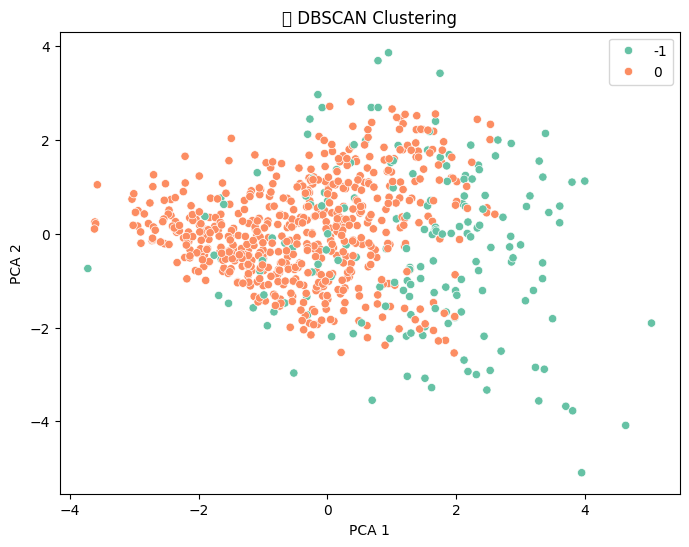

⚠️ DBSCAN n'a pas formé suffisamment de clusters pour évaluer le score.


In [ ]:
from sklearn.cluster import DBSCAN

# Appliquer DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled_unsup)

# Visualisation
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=dbscan_labels, palette="Set2")
plt.title("📌 DBSCAN Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# Évaluation
# DBSCAN peut générer -1 (bruit), donc uniquement si ≥ 2 clusters valides
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
if n_clusters_dbscan >= 2:
    score_dbscan = silhouette_score(X_scaled_unsup, dbscan_labels)
    print(f"✅ Silhouette Score (DBSCAN) : {score_dbscan:.2f}")
else:
    print("⚠️ DBSCAN n'a pas formé suffisamment de clusters pour évaluer le score.")


**Evaluation des modeles**


* Evaluer le modele K-Means




In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Créer un DataFrame temporaire avec la vérité terrain et les clusters
df_kmeans = pd.DataFrame({
    'Cluster_KMeans': kmeans_labels,
    'Outcome': df['Outcome']
})

# Tableau croisé
kmeans_crosstab = pd.crosstab(df_kmeans['Cluster_KMeans'], df_kmeans['Outcome'])
print("📊 Clusters KMeans vs Outcome:")
print(kmeans_crosstab)


📊 Clusters KMeans vs Outcome:
Outcome           0    1
Cluster_KMeans          
0               156  195
1               344   73


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt-

plt.figure(figsize=(5, 4))
sns.heatmap(kmeans_crosstab, annot=True, cmap='Blues', fmt='d')
plt.title("K-Means vs Outcome")
plt.xlabel("Outcome")
plt.ylabel("Cluster")
plt.show()


SyntaxError: invalid syntax (<ipython-input-26-2a1c273d2014>, line 2)

* Evaluer le modele CAH : Croisement entre CAH et Outcome

In [ ]:
df_cah = pd.DataFrame({
    'Cluster_CAH': cah_labels,
    'Outcome': df['Outcome']
})

cah_crosstab = pd.crosstab(df_cah['Cluster_CAH'], df_cah['Outcome'])
print("\n📊 Clusters CAH vs Outcome:")
print(cah_crosstab)


In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(cah_crosstab, annot=True, cmap='Greens', fmt='d')
plt.title("CAH vs Outcome")
plt.xlabel("Outcome")
plt.ylabel("Cluster")


* Croisement entre DBSCAN et Outcome

In [ ]:
df_dbscan = pd.DataFrame({
    'Cluster_DBSCAN': dbscan_labels,
    'Outcome': df['Outcome']
})

dbscan_crosstab = pd.crosstab(df_dbscan['Cluster_DBSCAN'], df_dbscan['Outcome'])
print("\n📊 Clusters DBSCAN vs Outcome:")
print(dbscan_crosstab)


In [ ]:

# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(dbscan_crosstab, annot=True, cmap="YlGnBu", fmt="d")
plt.title("DBSCAN Clusters vs Réalité (Outcome)")
plt.xlabel("Outcome réel")
plt.ylabel("Cluster DBSCAN")
plt.tight_layout()
plt.show()

**Comparaison entre les modéles**

In [ ]:
print("\n📊 Comparaison des Scores Silhouette :")
print(f"KMeans : {score_kmeans:.2f}")
print(f"CAH    : {score_cah:.2f}")
if n_clusters_dbscan >= 2:
    print(f"DBSCAN : {score_dbscan:.2f}")
else:
    print("DBSCAN : Non applicable (clusters insuffisants)")


**Clustering (non supervisé)**

* PCA réduit la dimension pour visualiser en 2D.

* K-Means sépare globalement les deux groupes, mais avec des chevauchements.

* DBSCAN détecte aussi des points bruit (label -1) indiquant des cas atypiques.

* CAH montre la structure hiérarchique, utile pour comprendre la proximité entre les patients.

**Partie 4 : Interface Graphique avec Streamlit**

In [ ]:
# Partie 4 : Interface Graphique avec Streamlit

# Ce code se place dans un fichier "app.py"
# Pour lancer : streamlit run app.py

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

st.title("Prédiction de Diabète - Mini Projet")

# Upload fichier CSV
uploaded_file = st.file_uploader("Choisir un fichier CSV", type="csv")
if uploaded_file:
    data = pd.read_csv(uploaded_file)
    st.write("Aperçu des données")
    st.dataframe(data.head())

    # Statistiques descriptives
    st.write("Statistiques descriptives")
    st.write(data.describe())

    # Visualisation histogramme glucose
    fig, ax = plt.subplots()
    sns.histplot(data['Glucose'], bins=30, ax=ax)
    ax.set_title("Distribution Glucose")
    st.pyplot(fig)

    # Prétraitement simple
    cols_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
    data[cols_zeros] = data[cols_zeros].replace(0, pd.NA)
    for col in cols_zeros:
        data[col].fillna(data[col].median(), inplace=True)

    # Modèle Random Forest
    X = data.drop("Outcome", axis=1)
    y = data["Outcome"]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    model = RandomForestClassifier()
    model.fit(X, y)

    # Formulaire de prédiction
    st.header("Prédiction personnalisée")

    input_data = {}
    for col in X.columns:
        val = st.number_input(f"{col}", float(data[col].min()), float(data[col].max()), float(data[col].median()))
        input_data[col] = val

    if st.button("Prédire"):
        input_df = pd.DataFrame([input_data])
        pred = model.predict(input_df)[0]
        proba = model.predict_proba(input_df)[0][1]
        st.write(f"Prédiction: {'Diabétique' if pred==1 else 'Non diabétique'}")
        st.write(f"Probabilité de diabète: {proba:.2f}")

